In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
insurance_data = pd.read_csv('insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
insurance_data.shape

(1338, 7)

In [5]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 432x288 with 0 Axes>

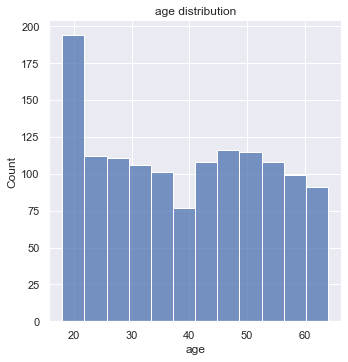

In [7]:
#data distribution of age

sns.set()
plt.figure()
sns.displot(insurance_data['age'])
plt.title('age distribution')
plt.show()

<Figure size 432x288 with 0 Axes>

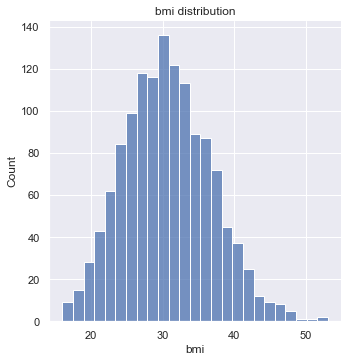

In [8]:
#data distribution of bmi

plt.figure()
sns.displot(insurance_data['bmi'])
plt.title('bmi distribution')
plt.show()

<Figure size 432x288 with 0 Axes>

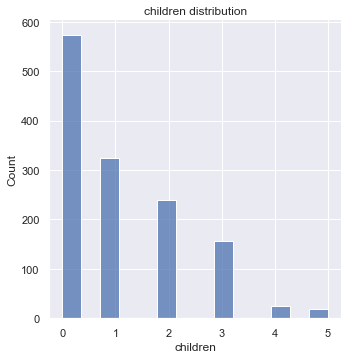

In [9]:
#data distribution of children

plt.figure()
sns.displot(insurance_data['children'])
plt.title('children distribution')
plt.show()

In [10]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

C:\Users\adars\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


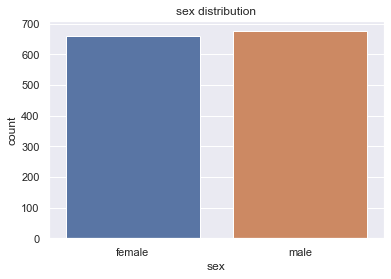

In [11]:
#data distribution of sex

plt.figure()
sns.countplot(insurance_data['sex'])
plt.title('sex distribution')
plt.show()

In [12]:
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\adars\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


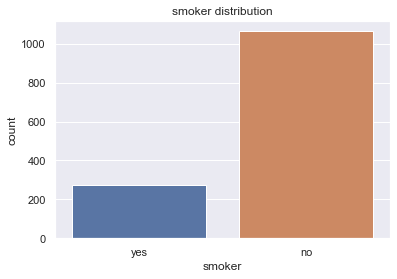

In [13]:
#data distribution of smoker

plt.figure()
sns.countplot(insurance_data['smoker'])
plt.title('smoker distribution')
plt.show()

In [14]:
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

C:\Users\adars\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


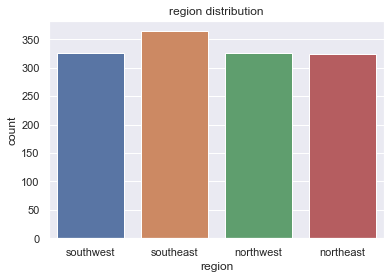

In [15]:
#data distribution of region

plt.figure()
sns.countplot(insurance_data['region'])
plt.title('region distribution')
plt.show()

In [16]:
insurance_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

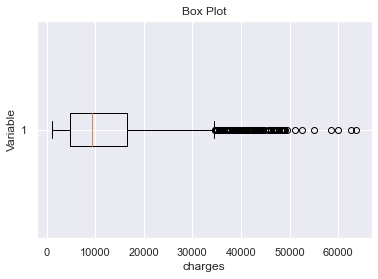

In [17]:
plt.boxplot(insurance_data['charges'], vert=False)
plt.ylabel('Variable')
plt.xlabel('charges')
plt.title('Box Plot')
plt.show()

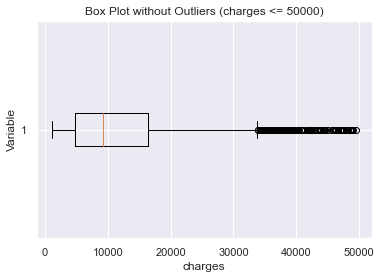

In [18]:
filtered_data = insurance_data[insurance_data['charges'] <= 50000]

plt.boxplot(filtered_data['charges'], vert=False)
plt.ylabel('Variable')
plt.xlabel('charges')
plt.title('Box Plot without Outliers (charges <= 50000)')
plt.show()

In [19]:
filtered_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [20]:
filtered_data.replace({'sex':{'female':0,'male':1}},inplace=True)

filtered_data.replace({'smoker':{'no':0,'yes':1}},inplace=True)

one_hot_encoded_data = pd.get_dummies(filtered_data, columns = ['region']) 
print(one_hot_encoded_data)

      age  sex     bmi  children  smoker      charges  region_northeast  \
0      19    0  27.900         0       1  16884.92400                 0   
1      18    1  33.770         1       0   1725.55230                 0   
2      28    1  33.000         3       0   4449.46200                 0   
3      33    1  22.705         0       0  21984.47061                 0   
4      32    1  28.880         0       0   3866.85520                 0   
...   ...  ...     ...       ...     ...          ...               ...   
1333   50    1  30.970         3       0  10600.54830                 0   
1334   18    0  31.920         0       0   2205.98080                 1   
1335   18    0  36.850         0       0   1629.83350                 0   
1336   21    0  25.800         0       0   2007.94500                 0   
1337   61    0  29.070         0       1  29141.36030                 0   

      region_northwest  region_southeast  region_southwest  
0                    0                

C:\Users\adars\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [21]:
from sklearn.preprocessing import normalize
d = normalize(one_hot_encoded_data, norm="l1")

In [22]:
pd.DataFrame(d)

,0,1,2,3,4,5,6,7,8,9
0,0.001122,0.000000,0.001648,0.000000,0.000059,0.997112,0.000000,0.000000,0.000000,0.000059
1,0.010111,0.000562,0.018968,0.000562,0.000000,0.969236,0.000000,0.000000,0.000562,0.000000
2,0.006201,0.000221,0.007308,0.000664,0.000000,0.985384,0.000000,0.000000,0.000221,0.000000
3,0.001497,0.000045,0.001030,0.000000,0.000000,0.997382,0.000000,0.000045,0.000000,0.000000
4,0.008143,0.000254,0.007349,0.000000,0.000000,0.983999,0.000000,0.000254,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1326,0.004679,0.000094,0.002898,0.000281,0.000000,0.991955,0.000000,0.000094,0.000000,0.000000
1327,0.007976,0.000000,0.014143,0.000000,0.000000,0.977438,0.000443,0.000000,0.000000,0.000000
1328,0.010678,0.000000,0.021861,0.000000,0.000000,0.966868,0.000000,0.000000,0.000593,0.000000
1329,0.010215,0.000000,0.012550,0.000000,0.000000,0.976748,0.000000,0.000000,0.000000,0.000486


In [23]:
corrr = one_hot_encoded_data.corr()

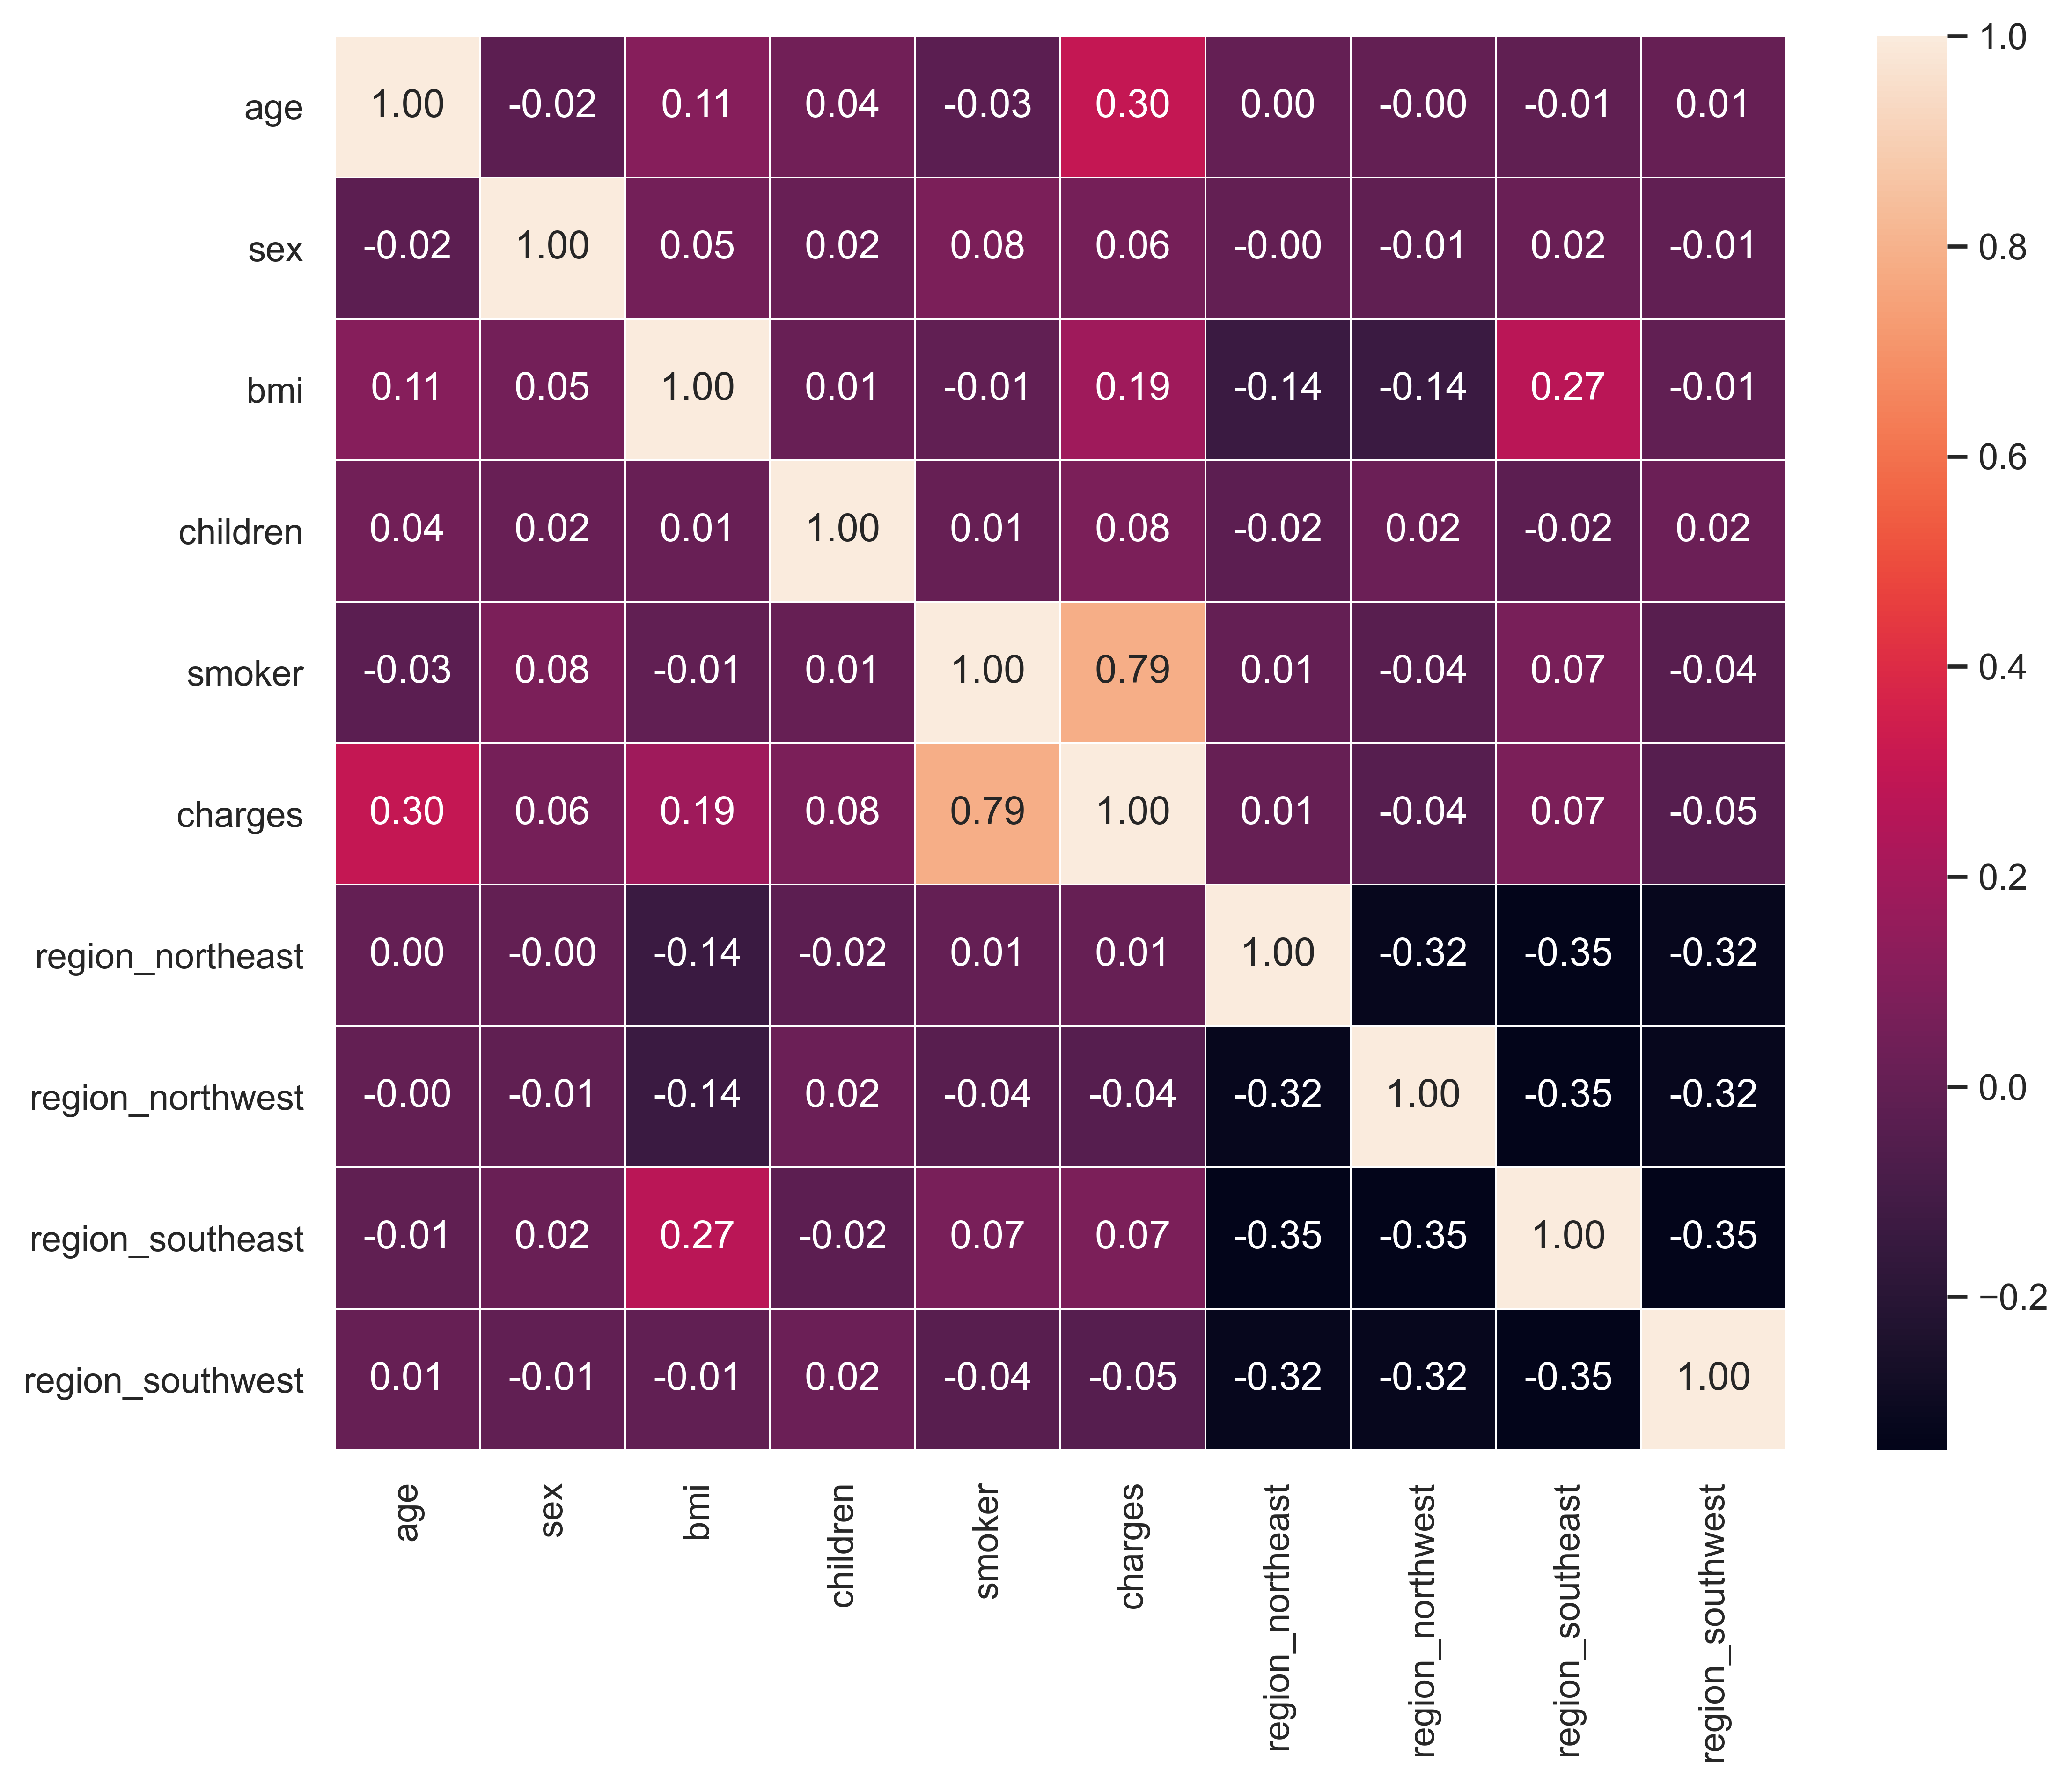

In [24]:
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corrr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

In [25]:
X = one_hot_encoded_data.drop(columns='charges',axis=1)
Y = one_hot_encoded_data['charges']

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2)

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [28]:
models = {
    "LinearRegression":LinearRegression(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,Y_train) #train model
    
    #make prediction
    train_prediction = model.predict(X_train)
    test_prediction = model.predict(X_test)
    
    #training and testing accuracy
    r2_train = metrics.r2_score(Y_train,train_prediction)
    r2_test = metrics.r2_score(Y_test,test_prediction)
    
    mse = mean_squared_error(Y_test, test_prediction)
    
    rmse = np.sqrt(mse)
    
    print(list(models.keys())[i])
    
    print("r2_train=",r2_train)
    print("r2_test=",r2_test)
    print("mse=",mse)
    print("rmse=",rmse,"\n")

LinearRegression
r2_train= 0.7493623325850491
r2_test= 0.7637807498534037
mse= 33918136.91403116
rmse= 5823.92796264095 

DecisionTreeRegressor
r2_train= 0.998723972041507
r2_test= 0.7560596747719364
mse= 35026786.956625916
rmse= 5918.3432611353255 

RandomForestRegressor
r2_train= 0.9761344069983451
r2_test= 0.8618503259628291
mse= 19836569.440100975
rmse= 4453.826381899162 



In [29]:
input_data = (19,0,27.900,0,1,0,0,0,1)
input_data_array = np.asarray(input_data)
input_data_array = input_data_array.reshape(1,-1)


In [30]:
selected_model = models["RandomForestRegressor"] 
predictions = selected_model.predict(input_data_array)

In [31]:
predictions

array([16876.399077])

In [32]:
import pickle as pkl

In [33]:
pkl.dump(selected_model,open("Mlpro.pkl","wb"))